In [342]:
import math
import itertools
import statistics


# Constructing probability distributions:


In [383]:
c = itertools.product('HT',repeat=3)
for i in list(c):
    print(i)

('H', 'H', 'H')
('H', 'H', 'T')
('H', 'T', 'H')
('H', 'T', 'T')
('T', 'H', 'H')
('T', 'H', 'T')
('T', 'T', 'H')
('T', 'T', 'T')


# Mean (expected value) of a discrete random variable:


In [344]:
from scipy.stats import rv_discrete

In [345]:
xk = (100,10)
pk = (0.1,0.9)
custm = rv_discrete(name='custm', values=(xk, pk)) 
rv_discrete.mean(custm) #100*0.1 + 10*0.9

19.0

# Standard deviation of a discrete random variable:


In [346]:
xk = (100,10)
pk = (0.1,0.9)
custm = rv_discrete(name='custm', values=(xk, pk)) 
rv_discrete.std(custm)  #math.sqrt(((100-19)**2)*0.1+((10-19)**2)*0.9)

27.0

In [347]:
xk = (60,-9.94)
pk = (0.999,0.001)

custm = rv_discrete(name='custm', values=(xk, pk)) 
rv_discrete.std(custm),rv_discrete.mean(custm)

(2.210590870423609, 59.93006)

# Probability in normal density curves:


In [348]:
from scipy.stats import norm 

In [349]:
mu = 26 
sd = 2
n = 30
a = norm.cdf(n,mu,sd)
a,1-a

(0.9772498680518208, 0.02275013194817921)

In [350]:
mu = 150
sd = 20
n1 = 150
n2 = 130
a = norm.cdf(n1,mu,sd)
b = norm.cdf(n2,mu,sd)
a,b,a-b

(0.5, 0.15865525393145707, 0.3413447460685429)

# Combining normal random variables:

In [351]:
mu = 65
sd = 12
num = 4
n1 = 290

new_mu = num*mu
new_sd =math.sqrt((sd**2)*num)

a = norm.cdf(n1,new_mu,new_sd)

new_mu,new_sd,a,1-a

(260, 24.0, 0.8943502263331446, 0.10564977366685535)

In [352]:

mu1 = 20
sd1 = 6.4
mu2 = 18
sd2 = 4.8

n1 = 10
n2 = -10

new_mu = mu1 - mu2
new_sd = math.sqrt((sd1**2)+(sd2**2))

a = norm.cdf(n1,new_mu,new_sd)
b = norm.cdf(n2,new_mu,new_sd)

diff = a-b # P(|D|<10)


print('New Mean and New SD:',new_mu,',',new_sd)
print('P( D < 10 ):',a)
print('P( D < -10 ):',b)
print('P( |D| < 10):',diff)

New Mean and New SD: 2 , 8.0
P( D < 10 ): 0.8413447460685429
P( D < -10 ): 0.06680720126885807
P( |D| < 10): 0.7745375447996848


In [353]:
#Find the probability that the woman is taller than the man

mu_men = 172
sd_men = 7.2
mu_women = 162
sd_women = 5.4

diff_mu = mu_men - mu_women 
dif_sd = math.sqrt((sd_men**2)+(sd_women**2))

p_woman_tallerThan_man = norm.cdf(0,diff_mu,dif_sd) # difference should be less than 0



print('Diff of Mean Height and SD:',diff_mu,',',dif_sd)
print('Probability that the Woman is taller than the Man.:',p_woman_tallerThan_man)


Diff of Mean Height and SD: 10 , 9.0
Probability that the Woman is taller than the Man.: 0.13326026290250537


# Calculating binomial probability:


In [354]:
from itertools import combinations
from scipy.stats import binom

1) A division of a company has over 200 employees, 40% of which are male. 
The company is going to randomly select 4 of these employees to attend a conference. 
Let X = the number of male employees chosen.
What is the probability that exactly 3 of the 4 employees chosen are male?

In [355]:

SRS = [1,2,3,4]
X = 3
p_trial = 0.4
binomial_coef = len(list(combinations(SRS,X)))
p_X = binomial_coef *(p_trial**X)*((1-p_trial)**(len(SRS)-X))  #p(exactly k scores in n attempts)= (nCk)* ((p)^k)*((1-p)^(n-k))
p_X

0.15360000000000004

OR

In [356]:
binom.pmf(X,len(SRS),0.4)

0.15360000000000007

2) Marta makes 90% of the free throws she attempts.
She is going to shoot 3 free throws. Assume that the results of free throws are independent from each other. 
Let X represent the number of free throws she makes.
Find the probability that Marta makes at least 2 of the 3 free throws?

In [357]:
SRS = [1,2,3]
X = 2
X1 = 3
p_trial = 0.9
binomial_coef = len(list(combinations(SRS,X)))
binomial_coef1 = len(list(combinations(SRS,X1)))

p_X = binomial_coef *(p_trial**X)*((1-p_trial)**(len(SRS)-X))
p_X1 = binomial_coef1 *(p_trial**X1)*((1-p_trial)**(len(SRS)-X1))

p_X,p_X1,p_X+p_X1

(0.24299999999999997, 0.7290000000000001, 0.9720000000000001)

OR

In [358]:
binom.pmf(2,3,0.9)+binom.pmf(3,3,0.9)

0.972

OR

In [359]:
1- binom.cdf(1,3,0.90)

0.972

# Mean and standard deviation of a binomial random variable:


A large fast-food chain runs a promotion where 1-in-4 boxes of french fries include a coupon for a free box of french fries. Suppose that some location sells 100 of these boxes of fries per day. Let X = the number of coupons won per day. Find the mean and standard deviation of X.

In [360]:
p = 1/4 
n = 100

mu = n*p
std = math.sqrt(n*p*(1-p))

mu,std

(25.0, 4.330127018922194)

OR

In [361]:
binom.mean(n,p), binom.std(n,p)

(25.0, 4.330127018922194)

# Geometric probability:


In [362]:
from scipy.stats import geom

New visitors to a certain website have a 0.15 probability of creating an account on their first visit. Let V be the number of new visitors who visit the site until the first one of them creates an account. Assume that each visitor's decision to create an account or not is independent.
Find the probability that the 6th new visitor is the first to create an account.

In [363]:
p_get_firstOne = 0.15
n=6
p_V6th = ((1-p_get_firstOne)**(n-1))*(p_get_firstOne)
p_V6th

0.06655579687499999

OR

In [364]:
geom.pmf(n, p_get_firstOne)

0.06655579687499999

# Cumulative geometric probability:


1) Jeremiah makes 25% of the three-point shots he attempts. For a warm up, Jeremiah likes to shoot three-point shots until he makes one. Let M be the number of shots it takes Jeremiah to make his first three-point shot. Assume that the results of each shot are independent.
Find the probability that it takes Jeremiah more than 6 attempts to make his first shot.

In [365]:
1-geom.cdf(6,0.25) 

0.177978515625

2) Zach scores a ringer 40% of the time that he throws a horseshoe. Let R be the number of throws it takes Zach to score his first ringer in a game. Assume the results of each throw are independent.
Find the probability that it takes Zach 5 or more throws to score his first ringer.

In [366]:
1-geom.cdf(4,0.4)   # 5 or more means (>4)

0.12959999999999994

# Expected value with empirical probabilities:


1)Erin has been watching a lot of television lately. Each day for the last 100 days, she has documented how many episodes of television she has watched. The data she recorded is in the table below.
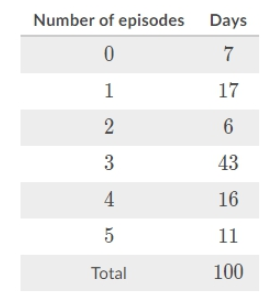

In [367]:
l = [7,17,6,43,16,11]
v = [0,1,2,3,4,5]
d = []
w = []
t = 0
summ = 0
for i in l:
    d.append(i/100)  #list of prob
    
while t<len(v):
    w.append(v[t]*d[t]) # list of expected values
    summ = summ+w[t]     # sum of exp values 
    t+=1
    
w,summ    

([0.0, 0.17, 0.12, 1.29, 0.64, 0.55], 2.7700000000000005)

# Expected value with calculated probabilities:

1) Lucas owns a car dealership in Brazil that is having a big sale for the next 3 days. Lucas's car dealership will lose revenue if it rains because potential customers will stay at home. 
There is a 50% chance of rain each of the next 3 days independent of the other days.
The table below shows Lucas's potential revenue for his dealership's big sale depending on how many days it rains.
What is Lucas's car dealerships' expected revenue over the next 3 days?
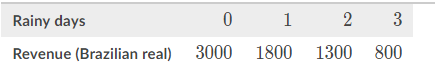

In [368]:
c = itertools.product('CR',repeat=3) #Relevant outcomes
for i in list(c):
    print(i)

('C', 'C', 'C')
('C', 'C', 'R')
('C', 'R', 'C')
('C', 'R', 'R')
('R', 'C', 'C')
('R', 'C', 'R')
('R', 'R', 'C')
('R', 'R', 'R')


In [369]:

# Probability = Relevant outcomes / Size of the sample space

numOfDays = 3

size_of_sample_space = len(list(itertools.product('CR',repeat=numOfDays))) #Size of the sample space

revenue = [3000,1800,1300,800]

p_rainy_days = [1/8,3/8,3/8,1/8]

expected_revenue = 0

for r,p in zip(revenue,p_rainy_days):
    expected_revenue += r*p
    
print(expected_revenue)    

1637.5


2) Carlos is playing a dice game with Elena.
Carlos will roll 2 six-sided dice, and if the sum is greater than 7, he will win 5 dollars. 
If the sum is 7, they will tie and he will break even. 
If the sum is less than 7, he will lose 4 dollars.
What is Carlos's expected value of playing this game? Round your answer to the nearest cent.

In [370]:
greaterThanSeven=0
lessThanSeven=0
equalSeven=0
firstDice = [1,2,3,4,5,6]
secondDice = [1,2,3,4,5,6]


for f in firstDice:
    for s in secondDice:
        summ = f+s
        if(summ>7):
            greaterThanSeven+=1
        elif(summ<7):
            lessThanSeven+=1
        else:
            equalSeven+=1
            
outcomes = greaterThanSeven + lessThanSeven + equalSeven  
list1 = [greaterThanSeven,equalSeven,lessThanSeven]
money = [5,0,-4]
exp_value = 0

for i,s in zip(money,list1):
    exp_value+=i*s/outcomes
    
print(round(exp_value,2))

0.42


3) Merita has decided to play in The Clothing Combo Contest. First, she will randomly choose from a pair of brown, purple, blue, green, or black pants. Next, she will randomly choose from a black, brown, or green shirt.
If both the shirt and pants are a color that starts with a "B", she will win 10 dollars . If only one of the pieces of clothing is a color that starts with a "B", she will break even. Under any other outcome, she will lose 20 dollars.
What is Merita’s expected value of playing The Clothing Combo Contest?

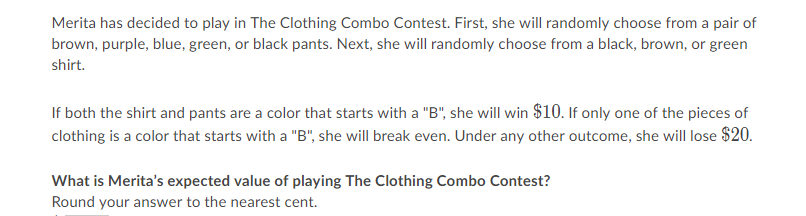

In [371]:
twoB=0
oneB=0
noB=0
pants = ['b','p','b','g','b']
shirts = ['b','b','g']


for p in pants:
    for s in shirts:
        summ = p+s
        if 'b' in summ:
             if(summ=='bb'):
                twoB+=1
             else:
                oneB+=1
        else:
            noB+=1
            
outcomes = twoB + oneB + noB 
list1 = [twoB, oneB, noB ]
money = [10,0,-20]
exp_value = 0

for i,s in zip(money,list1):
    exp_value+=i*s/outcomes
    
print(list1,outcomes,round(exp_value,2))

[6, 7, 2] 15 1.33


#4

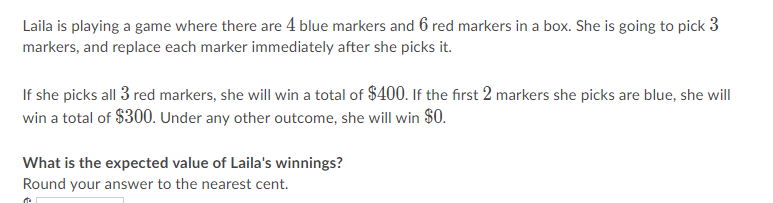

In [372]:
a = 0.6**3 #probability to get 3 red markers in a row
b = 0.4**2 #probability to get 2 blue markers in a row
c = 1-a-b  #probability of another result
d=a*400+b*300+c*0 #expected value
a,b,c,d

(0.21599999999999997, 0.16000000000000003, 0.624, 134.4)

#5

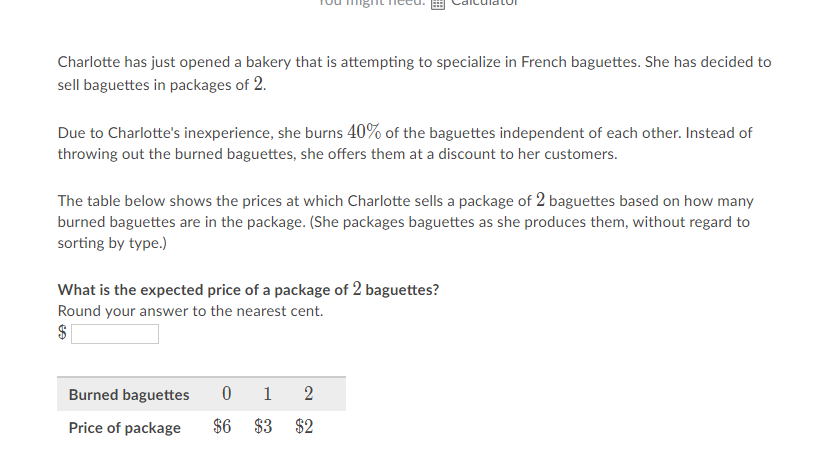

In [373]:
prBN = itertools.product('BN',repeat=2) #Relevant outcomes
for i in list(prBN):
    print(i)

('B', 'B')
('B', 'N')
('N', 'B')
('N', 'N')


In [374]:
prices = [6,3,2]

p_burned = [0.6*0.6,0.4*0.6+0.6*0.4,0.4*0.4] 

expected_price = 0

for price,prob in zip(prices,p_burned):
    expected_price += price*prob
    
print(expected_price)   


3.92


# Making decisions with expected values:


#1

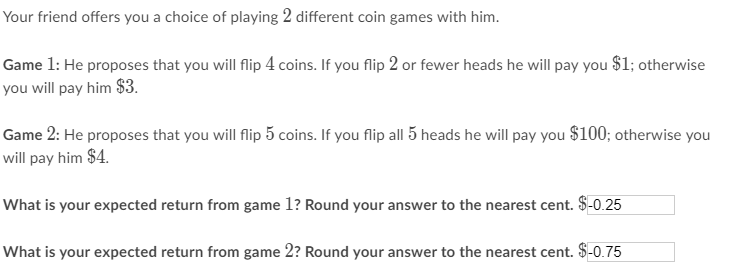

In [421]:
#first game 
p_win = binom.cdf(2,4,0.5)
p_lose = (1-binom.cdf(2,4,0.5))
exp_value = binom.cdf(2,4,0.5)*1+(1-binom.cdf(2,4,0.5))*(-3)
print(p_win,p_lose,exp_value)

0.6875 0.3125 -0.25


In [423]:
#second game
p_win = binom.pmf(5,5,0.5)
p_lose = 1-binom.pmf(5,5,0.5)
exp_value = (1-binom.pmf(5,5,0.5))*(-4)+binom.pmf(5,5,0.5)*100
print(p_win,p_lose,exp_value)

0.03125 0.96875 -0.75


#2

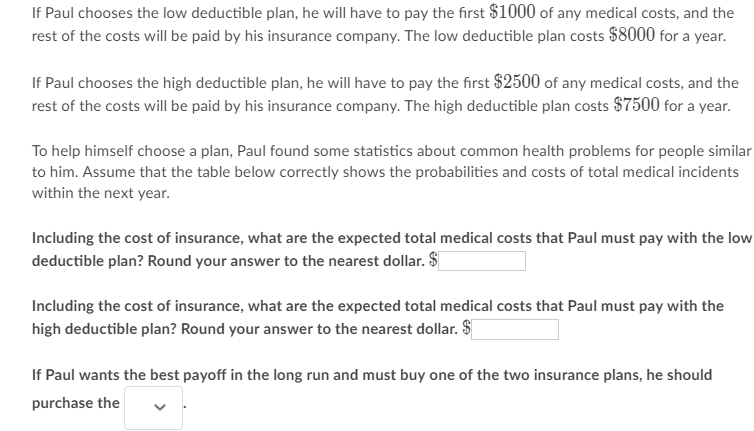

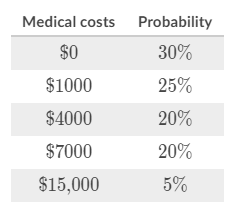


In [466]:

#expected total medical costs that Paul must pay with the low deductible plan
Exp_v_lowD = 8000 + 0.3*0 + 0.25*1000 +0.2*1000 + 0.2*1000+ 0.05*1000 

#expected total medical costs that Paul must pay with the high deductible plan
Exp_v_highD = 7500 + 0.3*0 + 0.25*1000 + 0.2*2500 + 0.2*2500 + 0.05*2500

print(Exp_v_lowD, Exp_v_highD)

8700.0 8875.0
